***
***
***

<br><h1 style="font-size:300%;">Apprentice Chef Case Study</h1>
<br><strong> A Classification Problem </strong><br><br>
<b>DAT-5303 | Machine Learning</b>
<br>DENIZ GÜRCAN - 4927234<br>
<br> Chase Kusterer<br>
Hult International Business School<br><br><br>




***
***
***

<h3><u> Pre-Analysis </u></h3><br>
In order to conduct the analysis the initial step is to set up the infrastructure to do so. <br>
That means all relevant packages and the dataset have to be imported. <br>
The dataset was supplied in .xslx and is handled accordingly. <br>
After that we call the dataframe's head in order to see whether the import was successful.

In [9]:
# Importing relevant packages
import pydotplus
import random                  as rand                        # random number gen
import pandas                  as pd                          # data science essentials
import matplotlib.pyplot       as plt                         # data visualization
import seaborn                 as sns                         # enhanced data viz
import numpy                   as np                          # mathematical essentials
import pandas                  as pd                          # data science essentials
import matplotlib.pyplot       as plt                         # data visualization
import statsmodels.formula.api as smf                         # smf
from sklearn.model_selection   import train_test_split        # train-test split
from sklearn.linear_model      import LogisticRegression      # logistic regression
from sklearn.linear_model      import LinearRegression        # linear regression
from sklearn.metrics           import confusion_matrix        # confusion matrix
from sklearn.metrics           import roc_auc_score           # auc score
from sklearn.neighbors         import KNeighborsClassifier    # KNN for classification
from sklearn.neighbors         import KNeighborsRegressor     # KNN for regression
from sklearn.preprocessing     import StandardScaler          # standard scaler
from sklearn.tree              import DecisionTreeClassifier  # classification trees
from sklearn.tree              import export_graphviz         # exports graphics
from sklearn.externals.six     import StringIO                # saves objects in memory
from IPython.display           import Image                   # displays on frontend
from sklearn.model_selection   import GridSearchCV            # hyperparameter tuning
from sklearn.metrics           import make_scorer             # customizable scorer
from sklearn.ensemble          import RandomForestClassifier  # random forest
from sklearn.ensemble          import GradientBoostingClassifier # gbm
from sklearn.ensemble          import AdaBoostClassifier      # ADA Boost classifier 


# Importing relevant packages
import pandas                  as pd                          # Data Science Essentials
import seaborn                 as sns                         # Data Visualization advanced
import matplotlib.pyplot       as plt                         # Data Visualization
import statsmodels.formula.api as smf                         # smf
import numpy                   as np                          # Math Essentials
import statsmodels.formula.api as smf                         # regression modeling
import sklearn.linear_model
from sklearn.model_selection   import train_test_split        # train/test split
from sklearn.linear_model      import LinearRegression 
from sklearn.ensemble          import GradientBoostingRegressor
from sklearn.preprocessing     import StandardScaler          # standard scaler


# Determining and importing the dataset into Python
file        = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)


# Defining pd print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# Viewing the first 5 rows (n=5) of the dataset
original_df.head(n = 5)



//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0              6          2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0              6          1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1              6          2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1              6          1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0
4   1923.0                   1                 Aegon V Targaryen         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen                   65                   3                            6                          9                   106.00              1                          1                         1                       0              6          2           12                 0                4               1                    0                            90              135.3                   3                        1                   3                    13                  253

<u><h3> Initial data exploration </u></h3><br>
Map out if there are any columns with missing values within the dataset. <br>
At this point of the analysis we do not want to drop any columns yet. <br>
Even though some of the variables might seem not contributing to the overall objective,<br>
they might have an impact and should not be disregarded without further analysis.

In [10]:
# Investigating if there are any missing values
print(original_df.isnull().any())
# The only colums with missing values is Family_Name

# Determining how many missng values Family-Name has
print(original_df['FAMILY_NAME'].isnull().sum())

# Family-Name has 47 missing values and might be excluded from further analysis



REVENUE                         False
CROSS_SELL_SUCCESS              False
NAME                            False
EMAIL                           False
FIRST_NAME                      False
FAMILY_NAME                      True
TOTAL_MEALS_ORDERED             False
UNIQUE_MEALS_PURCH              False
CONTACTS_W_CUSTOMER_SERVICE     False
PRODUCT_CATEGORIES_VIEWED       False
AVG_TIME_PER_SITE_VISIT         False
MOBILE_NUMBER                   False
CANCELLATIONS_BEFORE_NOON       False
CANCELLATIONS_AFTER_NOON        False
TASTES_AND_PREFERENCES          False
MOBILE_LOGINS                   False
PC_LOGINS                       False
WEEKLY_PLAN                     False
EARLY_DELIVERIES                False
LATE_DELIVERIES                 False
PACKAGE_LOCKER                  False
REFRIGERATED_LOCKER             False
FOLLOWED_RECOMMENDATIONS_PCT    False
AVG_PREP_VID_TIME               False
LARGEST_ORDER_SIZE              False
MASTER_CLASSES_ATTENDED         False
MEDIAN_MEAL_

In [11]:
original_df.describe().round(2)

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1899 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

In [12]:
#Cross Sell Succes is the variable that needs further exploration

original_df["CROSS_SELL_SUCCESS"].value_counts().sort_index()


0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64

<h1><u> Feature Tuning </u></h1><br>

First we will build the foundation of every model, <br>
which is feature engineering which includes feature- or hyper-parameter-tuning. <br>
This is an essential step since this will reveal underlying issues and patterns within the data, ultimately <br> affecting the quality of the model positively. <br><br>

New features are built and added to the dataset. <br>
Those consist of categorizing the the E-Mails and building dummy variables through one hot encoding. <br>
Furthermore there a variable is built in order to identify the average meal prize, <br>
which might be disregarded for the further analysis but is regarded to reveal insight. <br> <br>

The logarithm of the revenue is built at this early part of the analysis due to: <br>
<ul style="list-style-type:disc;">
  <li>the fact that a lot of variables are counts and exponential which makes a logarithm inevitable for a proper linear regression. </li>
  <li>a possible negative result in the further analysis, if the logarithm is calculated in a later stage.</li>  
</ul>  


<h3><u> E-Mail Categorization </u></h3>

Dividing E-Mail addresses based on their nature and intended usage. <br>
Three categories will be defined professional, private and Spam/Junk. <br><br>
Professional E-Mail-Domains are furthermore divided in subgroups based on the industry the specifics companies <br> operate in in order to reveal differences in the behavior of consumer that work in different environments.
This is of special importance since the company's primary target group are busy professionals. <br>


In [13]:
# First we split the data to make use of it
placeholder_lst = [] # defining an empty list 

# Creation of the for loop going over each value in the E-mail column
for index, col in original_df.iterrows(): 
    
    # Defining the split at the '@'
    email_spl = original_df.loc[index,'EMAIL'].split(sep = '@') 
    # Important to know that the split only works with txt objects
    
    # Filling the placeholder list with the slplit output
    placeholder_lst.append(email_spl)
    

# From list to dataframe 
email_spl_df = pd.DataFrame(placeholder_lst)


#displaying the results
email_spl_df

0                1
0                         addam.osgrey     passport.com
1                      aegon.blackfyre          jnj.com
2            aegon.frey.(son.of.aenys)        gmail.com
3     aegon.targaryen.(son.of.rhaegar)          ibm.com
4                    aegon.v.targaryen  goldmansacs.com
...                                ...              ...
1941                            yandry        yahoo.com
1942                            yorkel        gmail.com
1943                       young.henly        gmail.com
1944                            ysilla   protonmail.com
1945                      ysilla.royce      hotmail.com

[1946 rows x 2 columns]

In [14]:
# Safety Precaution
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

# Renaming the colum for concatenating
email_spl_df.columns = ['NAME' , 'EMAIL_DOMAIN']

# The Datasets have to be of equal length
original_df = pd.concat([original_df, email_spl_df.loc[:, 'EMAIL_DOMAIN']], # .loc = a safe way to do it
                   axis = 1)

# Viewing the value counts
original_df.loc[: ,'EMAIL_DOMAIN'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
jnj.com              28
cocacola.com         28
merck.com            28
nike.com             27
apple.com            27
ibm.com              26
dupont.com           26
ge.org               26
chevron.com          25
microsoft.com        25
travelers.com        24
unitedhealth.com     24
exxon.com            24
boeing.com           23
caterpillar.com      22
verizon.com          22
mmm.com              22
pg.com               22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
cisco.com            18
unitedtech.com       18
goldmansacs.com      18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAIN, dtype: int64

In [15]:
# Professional domains splittet into their related industries 
# Split based on the tier?

tech_domain      = ['@apple.com', '@cisco.com', '@ibm.com', '@intel.com',
                    '@unitedtech.com', '@verizon.com',
                    '@microsoft.com']

fin_domain       = ['@amex.com', '@goldmansacs.com', '@jpmorgan.com', 
                    '@visa.com' ]

med_domain       = ['@jnj.com', '@unitedhealth.com',  '@pfizer.com', 
                    '@merck.com']

fnb_domain       = ['@mcdonalds.com', '@cocacola.com']

chem_domain      = ['@exxon.com', '@chevron.com',  '@dupont.com']

multi_domain     = ['@caterpillar.com', '@mmm.com', '@walmart.com', 
                    '@pg.com']
 
life_domain      = ['@disney.com', '@homedepot.com', '@nike.com',
                    '@travelers.com']

eng_domain       = ['@boeing.com', '@ge.org']

# Private and Spam/Junk domains
private_domain   = ['@gmail.com', '@yahoo.com', '@protonmail.com']

spam_domain      = ['@me.com', '@aol.com', '@hotmail.com',
                    '@live.com', '@msn.com', '@passport.com']

placeholder_lst = []  

# The loop groups observations by domain type
for domain in original_df['EMAIL_DOMAIN']:
       
        if '@' + domain in tech_domain: 
            placeholder_lst.append('Technology')
        
        elif '@' + domain in fin_domain:
            placeholder_lst.append('Finance') 
        
        elif '@' + domain in med_domain:
            placeholder_lst.append('Pharmaceutical')
        
        elif '@' + domain in fnb_domain:
            placeholder_lst.append('Food_n_Beverage')
        
        elif '@' + domain in multi_domain:
            placeholder_lst.append('Chemistry_Oil')
        
        elif '@' + domain in chem_domain:
            placeholder_lst.append('FMCG_Wholesale')
        
        elif '@' + domain in life_domain:
            placeholder_lst.append('Lifestyle')
        
        elif '@' + domain in eng_domain:
            placeholder_lst.append('Engineering')
        
        elif '@' + domain in private_domain:
            placeholder_lst.append('Private')
            
        elif '@' + domain in spam_domain:
            placeholder_lst.append('Junk')

        else:
            print('Not specified')

In [16]:
# Adding it to the original dataframe by concatonating
original_df['DOMAIN_KIND'] = pd.Series(placeholder_lst)

# Checking how much observations are within each category
original_df['DOMAIN_KIND'].value_counts()

Private            861
Junk               389
Technology         153
Pharmaceutical     100
Lifestyle           89
Chemistry_Oil       87
Finance             87
FMCG_Wholesale      75
Food_n_Beverage     56
Engineering         49
Name: DOMAIN_KIND, dtype: int64

In [17]:
# One Hot encoding the newly created E-Mail Domains into to gain number forfor further analysis

# Creating binary dummies
# One Hot encoding
OH_domain = pd.get_dummies(original_df['DOMAIN_KIND'])

# Drop off columns with the categorial variables
original_df = original_df.drop('DOMAIN_KIND', axis = 1)
original_df = original_df.drop('EMAIL_DOMAIN', axis = 1)

# Combining the data
original_df = original_df.join(OH_domain)



In [18]:
#if original_df['Technology'].isnull().astype(int).sum() > 0:
 #   original_df['m_'+'Technology'] = original_df['Technology'].isnull().astype(int)
    

<h3><u> Average Meal Price </u></h3>

The Average Meal Price is calculated based on revenue and therefore not sufficient for the final model. <br>
However it might help to anticipate the revenue of customers within their first year.<br>


In [19]:
# Calculation of AMP
Avg_Meal_Price = original_df['REVENUE']/original_df['TOTAL_MEALS_ORDERED']

# Putting it into the dataframe
original_df['AVG_MEAL_PRICE'] = pd.Series(Avg_Meal_Price)



#We will work with the average cost of a meal  
AMP = (10+23)/2


#using a for loop to allocated drinks accordingly
original_df['AVG_DRINK_PRICE'] = original_df['AVG_MEAL_PRICE'] - AMP

drink_placeholder = []
for i in original_df['AVG_DRINK_PRICE']:
    if i > 0:
        temp = i
        drink_placeholder.append(temp)
    else: 
        temp = 0
        drink_placeholder.append(temp)
        
original_df['DRINK'] = pd.Series(drink_placeholder)


In [20]:
original_df.head(n=10)

REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  Chemistry_Oil  Engineering  FMCG_Wholesale  Finance  Food_n_Beverage  Junk  Lifestyle  Pharmaceutical  Private  Technology  AVG_MEAL_PRICE  AVG_DRINK_PRICE      DRINK
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0              6          2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0              0            0               0        0                0     1          0               0        0           0       15.932203        -0.567797   0.000000
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0              6          1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90              0            0               0        0                0     0          0               1        0           0       33.977273        17.477273  17.477273
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1              6          2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0              0            0               0        0                0     0          0               0        1           0       67.697368        51.197368  51.197368
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1              6          1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0              0            0               0        0                0     0          0               0        0           1       21.671053         5.171053   5.171053
4   1923.0                   1                 Aegon V Targaryen         aegon.v.targaryen@goldman

<h3><u> Revenue Logarithm </u></h3>

As stated before a, the logarithm of the Revenue has to be built in to built a linear regression with the data on hand.

In [21]:
# Adding the log revenue before analysing the data
original_df['REVENUE'] = np.log(original_df["REVENUE"])

In [22]:
# Adding the precentage of recommended meals to the df


original_df['REC'] = 0

original_df['REC'] = original_df['TOTAL_MEALS_ORDERED']*(original_df["FOLLOWED_RECOMMENDATIONS_PCT"]/100)

original_df.head()

REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  Chemistry_Oil  Engineering  FMCG_Wholesale  Finance  Food_n_Beverage  Junk  Lifestyle  Pharmaceutical  Private  Technology  AVG_MEAL_PRICE  AVG_DRINK_PRICE      DRINK    REC
0  7.539027                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0              6          2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0              0            0               0        0                0     1          0               0        0           0       15.932203        -0.567797   0.000000  106.2
1  7.309881                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0              6          1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90              0            0               0        0                0     0          0               1        0           0       33.977273        17.477273  17.477273   39.6
2  7.852633                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1              6          2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0              0            0               0        0                0     0          0               0        1           0       67.697368        51.197368  51.197368   30.4
3  7.406711                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1              6          1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0              0            0               0        0                0     0          0               0        0           1       21.671053         5.171053   5.171053   68.4
4  7.561642                   1                 Aegon V Tar

In [23]:
# Calling the head of the df to check if everything worked
original_df.head(n = 5)
#original_df.columns.value_counts()


REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  Chemistry_Oil  Engineering  FMCG_Wholesale  Finance  Food_n_Beverage  Junk  Lifestyle  Pharmaceutical  Private  Technology  AVG_MEAL_PRICE  AVG_DRINK_PRICE      DRINK    REC
0  7.539027                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0              6          2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0              0            0               0        0                0     1          0               0        0           0       15.932203        -0.567797   0.000000  106.2
1  7.309881                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0              6          1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90              0            0               0        0                0     0          0               1        0           0       33.977273        17.477273  17.477273   39.6
2  7.852633                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1              6          2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0              0            0               0        0                0     0          0               0        1           0       67.697368        51.197368  51.197368   30.4
3  7.406711                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1              6          1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0              0            0               0        0                0     0          0               0        0           1       21.671053         5.171053   5.171053   68.4
4  7.561642                   1                 Aegon V Tar

<h3><u> Outlier Analysis </u></h3><br>

Next we create plots to clearly identify outlier within the variables throughout the dataset. 
In order to reduce the code, a loop has been build to plot histograms which will not be run to decrease processing time. 
For that purpose we need to define the variables that we want to use.
Based on the plots and looking at upper limits we built boundaries that will be added to the dataset within new columns and variables.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


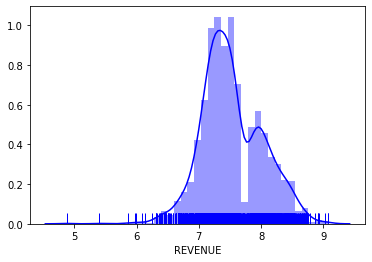

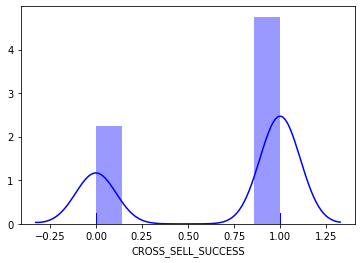

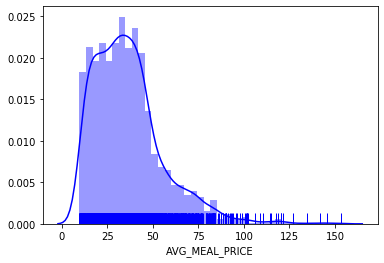

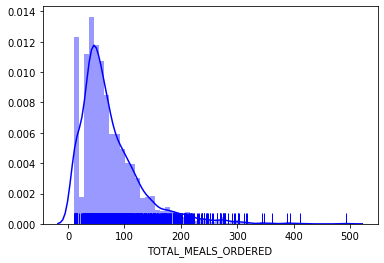

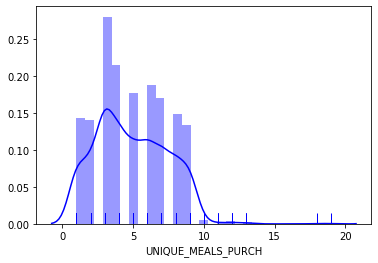

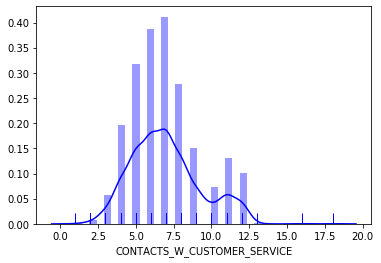

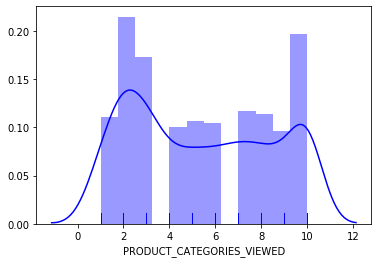

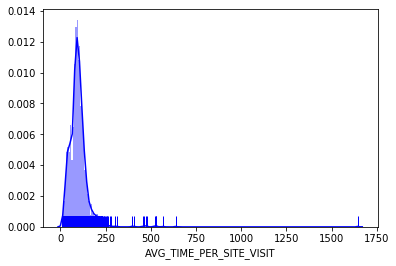

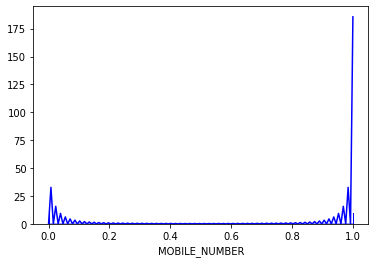

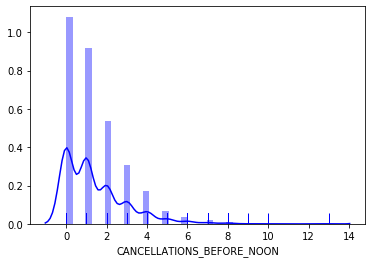

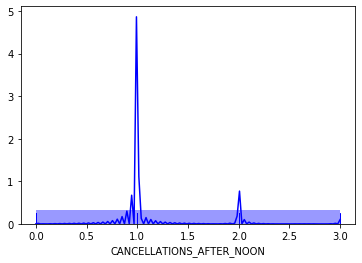

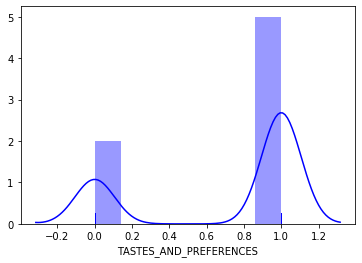

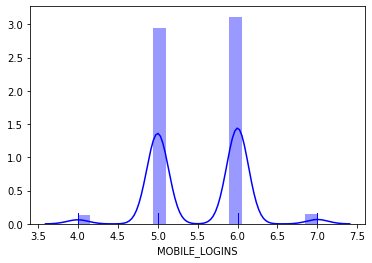

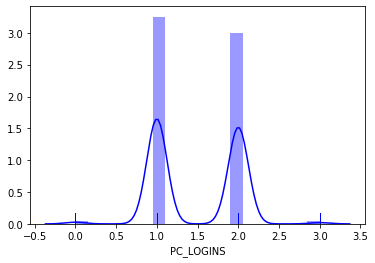

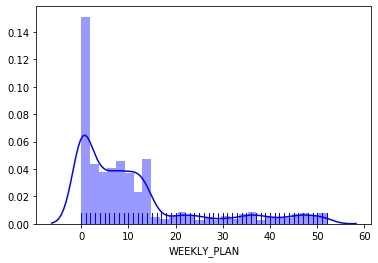

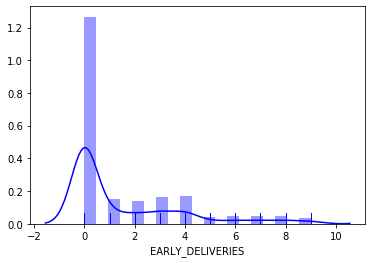

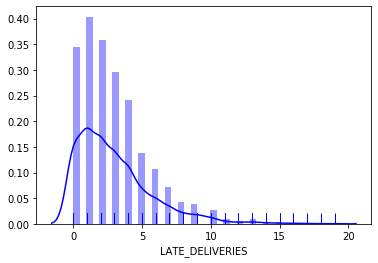

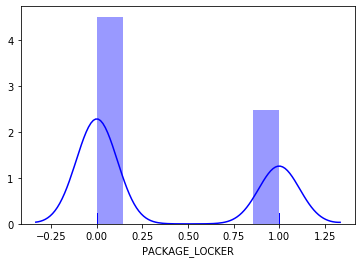

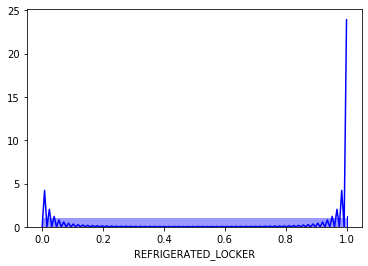

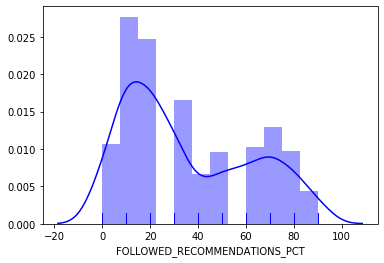

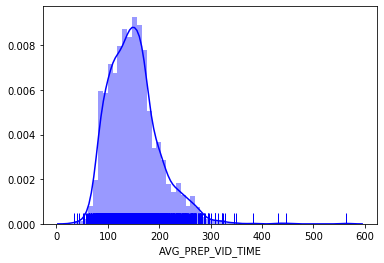

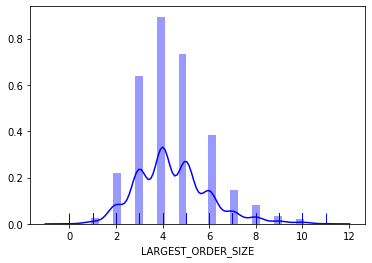

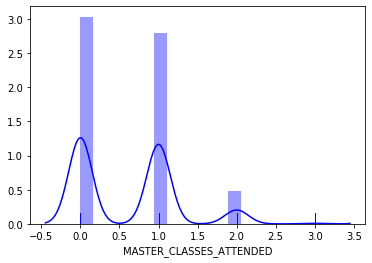

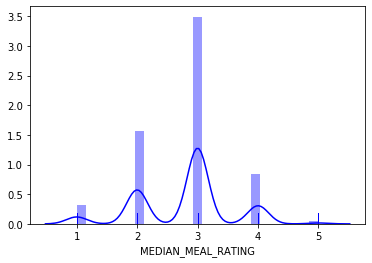

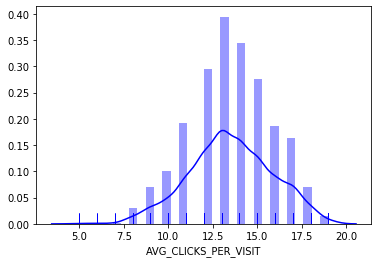

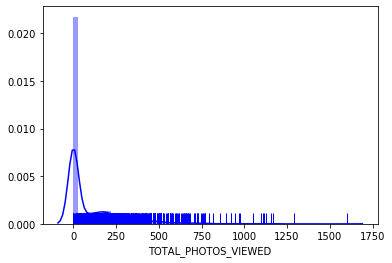

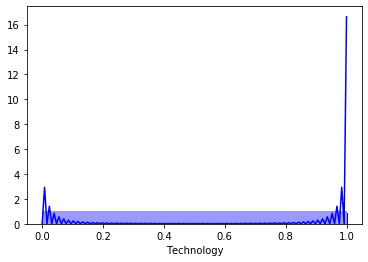

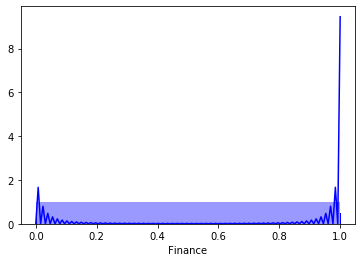

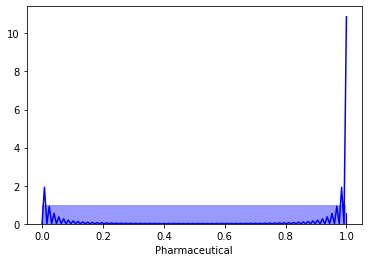

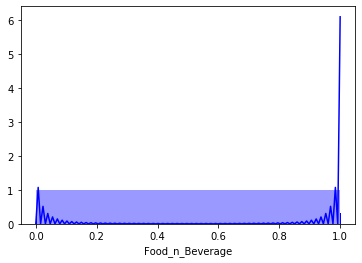

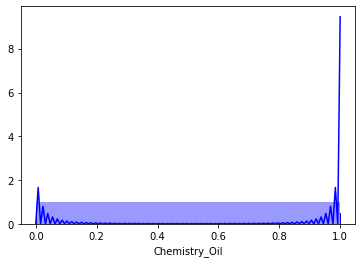

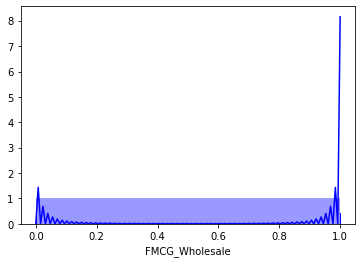

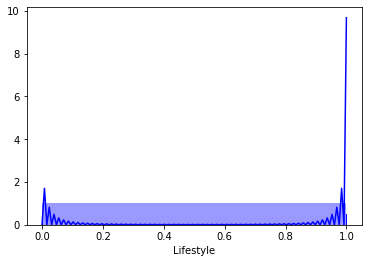

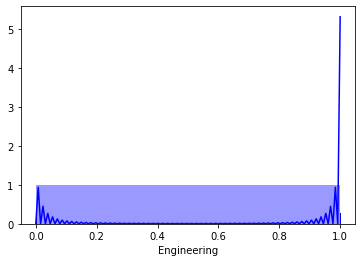

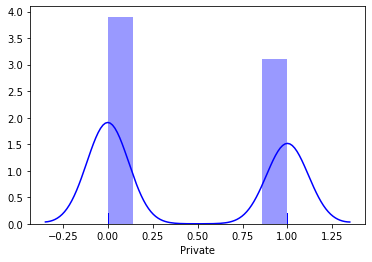

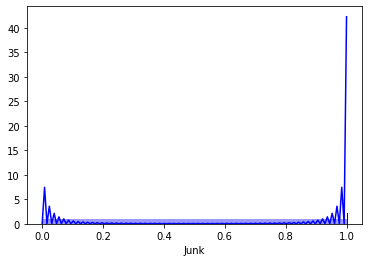

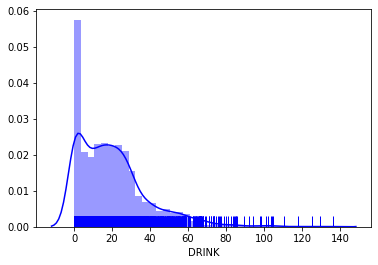

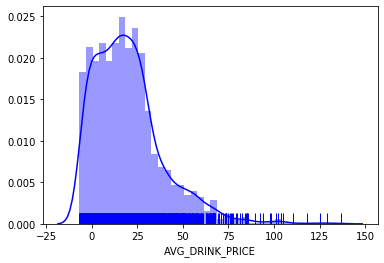

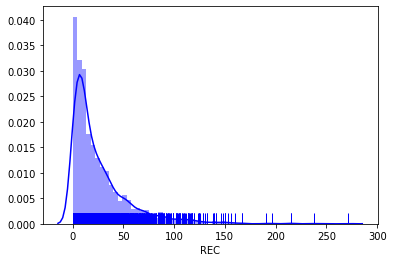

In [24]:
# Defining a list of the variales in order to mae the loop work
#Running the plots without variables that do not contribute to revenue as of common sense
#Those are: 'NAME','EMAIL','FIRST_NAME','FAMILY_NAME'

variable_lst = ['REVENUE',
                'CROSS_SELL_SUCCESS',
                'AVG_MEAL_PRICE',
                'TOTAL_MEALS_ORDERED', 
                'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE', 
                'PRODUCT_CATEGORIES_VIEWED',
                'AVG_TIME_PER_SITE_VISIT',
                'MOBILE_NUMBER', 
                'CANCELLATIONS_BEFORE_NOON',
                'CANCELLATIONS_AFTER_NOON', 
                'TASTES_AND_PREFERENCES', 
                'MOBILE_LOGINS',
                'PC_LOGINS', 
                'WEEKLY_PLAN', 
                'EARLY_DELIVERIES', 
                'LATE_DELIVERIES',
                'PACKAGE_LOCKER', 
                'REFRIGERATED_LOCKER', 
                'FOLLOWED_RECOMMENDATIONS_PCT',
                'AVG_PREP_VID_TIME', 
                'LARGEST_ORDER_SIZE', 
                'MASTER_CLASSES_ATTENDED',
                'MEDIAN_MEAL_RATING', 
                'AVG_CLICKS_PER_VISIT', 
                'TOTAL_PHOTOS_VIEWED',
                'Technology',
                'Finance',
                'Pharmaceutical',
                'Food_n_Beverage',
                'Chemistry_Oil',
                'FMCG_Wholesale',
                'Lifestyle',
                'Engineering',
                'Private',
                'Junk',
                'DRINK',
                'AVG_DRINK_PRICE',
                'REC']

# The loop goes over all variables and plots them
for h in variable_lst:
            fig, ax = plt.subplots(figsize = (6, 4))
            sns.distplot(original_df[h],
                         bins  = 'fd',
                         kde  = True,
                         rug  = True,
                         color = 'b')
            plt.xlabel(h)
            


In [25]:
# Identifying the value counts and quantiles

for i in variable_lst:
        print(i, original_df[i].quantile(.95))

print("__________")

for d in variable_lst:
    print(i, original_df[i].value_counts())

REVENUE 8.411832675758411
CROSS_SELL_SUCCESS 1.0
AVG_MEAL_PRICE 73.91865079365078
TOTAL_MEALS_ORDERED 186.75
UNIQUE_MEALS_PURCH 9.0
CONTACTS_W_CUSTOMER_SERVICE 11.0
PRODUCT_CATEGORIES_VIEWED 10.0
AVG_TIME_PER_SITE_VISIT 179.6825
MOBILE_NUMBER 1.0
CANCELLATIONS_BEFORE_NOON 4.0
CANCELLATIONS_AFTER_NOON 1.0
TASTES_AND_PREFERENCES 1.0
MOBILE_LOGINS 6.0
PC_LOGINS 2.0
WEEKLY_PLAN 45.0
EARLY_DELIVERIES 7.0
LATE_DELIVERIES 8.0
PACKAGE_LOCKER 1.0
REFRIGERATED_LOCKER 1.0
FOLLOWED_RECOMMENDATIONS_PCT 80.0
AVG_PREP_VID_TIME 244.77500000000003
LARGEST_ORDER_SIZE 7.0
MASTER_CLASSES_ATTENDED 2.0
MEDIAN_MEAL_RATING 4.0
AVG_CLICKS_PER_VISIT 17.0
TOTAL_PHOTOS_VIEWED 471.5
Technology 1.0
Finance 0.0
Pharmaceutical 1.0
Food_n_Beverage 0.0
Chemistry_Oil 0.0
FMCG_Wholesale 0.0
Lifestyle 0.0
Engineering 0.0
Private 1.0
Junk 1.0
DRINK 57.41865079365079
AVG_DRINK_PRICE 57.41865079365079
REC 86.725
__________
REC 0.0      155
3.0       20
4.2       16
8.4       16
2.6       16
        ... 
68.8       1
14.7    

In [26]:
# Creating the thresholds
REVE_hi       = 8.4
AMP_lo        = 10
AMP_hi        = 73.92
TOMEO_hi      = 186.75 
UNMEP_hi      = 9
COCUS_lo      = 3
COCUS_hi      = 11
#PCV_hi        = 10
ATSV_hi       = 179.68 
CABEN_lo      = 0
CABEN_hi      = 4
CAAFN_lo      = 0
CAAFN_hi      = 1
MOLO_lo       = 4
MOLO_hi       = 6
PCLO_lo       = 0
PCLO_hi       = 2
WEPL_hi       = 45 
ERDE_hi       = 7
LADE_hi       = 8
FOREP_lo      = 10
FOREP_hi      = 80
AVPRVIT_lo    = 75
AVPRVIT_hi    = 244.77
LAOS_lo       = 2
LAOS_hi       = 7
MACLA_hi      = 2
MEMER_hi      = 4
AVCLV_lo      = 8
AVCLV_hi      = 17
TOPHV_lo      = 25
TOPHV_hi      = 471.5
DRINK_hi      = 35   # might also be 35
REC_hi        = 86.72  # might be 50

#REVENUE
original_df['OUT_REVE'] = 0
condition_hi = original_df.loc[0:,'OUT_REVE'][original_df['REVENUE'] > REVE_hi]
original_df['OUT_REVE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVERAGE MEAL PRICE

original_df['OUT_AMP'] = 0
conditioin_hi = original_df.loc[0:, 'OUT_AMP'][original_df['AVG_MEAL_PRICE'] > AMP_hi]
condition_lo = original_df.loc[0:, 'OUT_AMP'][original_df['AVG_MEAL_PRICE'] < AMP_lo]
original_df['OUT_AMP'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_AMP'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)
#TOTAL_MEALS_ORDERED
original_df['OUT_TOMEO'] = 0
condition_hi = original_df.loc[0:,'OUT_TOMEO'][original_df['TOTAL_MEALS_ORDERED'] > TOMEO_hi]
original_df['OUT_TOMEO'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# #PRODUCT_CATEGORIES_VIEWED
# original_df['OUT_PCV'] = 0
# condition_hi = original_df.loc[0:, 'OUT_PCV'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PCV_hi]
# original_df['OUT_PCV'].replace(to_replace = condition_hi,
#                                 value      = 1,
#                                inplace    = True)

#UNIQUE_MEALS_PURCH
original_df['OUT_UNMEP'] = 0
condition_hi = original_df.loc[0:, 'OUT_UNMEP'][original_df['UNIQUE_MEALS_PURCH'] > UNMEP_hi]
original_df['OUT_UNMEP'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CONTACTS_W_CUSTOMER_SERVICE
original_df['OUT_COCUS'] = 0
conditioin_hi = original_df.loc[0:, 'OUT_COCUS'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > COCUS_hi]
condition_lo = original_df.loc[0:, 'OUT_COCUS'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < COCUS_lo]
original_df['OUT_COCUS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_COCUS'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#AVG_TIME_PER_SITE_VISIT
original_df['OUT_ATSV'] = 0
condition_lo = original_df.loc[0:,'OUT_ATSV'][original_df['AVG_TIME_PER_SITE_VISIT'] > ATSV_hi]
original_df['OUT_ATSV'].replace(to_replace = condition_hi,
                                value        = 1,
                                inplace      = True)

#CANCELLATIONS_BEFORE_NOON
original_df['OUT_CABEN'] = 0
condition_hi = original_df.loc[0:, 'OUT_CABEN'][original_df['CANCELLATIONS_BEFORE_NOON'] > CABEN_hi]
conditioin_lo = original_df.loc[0:, 'OUT_CABEN'][original_df['CANCELLATIONS_BEFORE_NOON'] < CABEN_lo]
original_df['OUT_CABEN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_CABEN'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#CANCELLATIONS_AFTER_NOON
original_df['OUT_CAAFN'] = 0
condition_hi = original_df.loc[0:,'OUT_CAAFN'][original_df['CANCELLATIONS_AFTER_NOON'] > CAAFN_hi]
condition_lo = original_df.loc[0:,'OUT_CAAFN'][original_df['CANCELLATIONS_AFTER_NOON'] < CAAFN_lo]
original_df['OUT_CAAFN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_CAAFN'].replace(to_replace  = condition_lo,
                                value      = 1,
                                inplace    = True)
#MOBILE_LOGINS
original_df['OUT_MOLO'] = 0
condition_hi = original_df.loc[0:, 'OUT_MOLO'][original_df['MOBILE_LOGINS'] > MOLO_hi]
condition_lo = original_df.loc[0:, 'OUT_MOLO'][original_df['MOBILE_LOGINS'] < MOLO_lo]
original_df['OUT_MOLO'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_MOLO'].replace(to_replace  = condition_lo,
                                value      = 1,
                                inplace    = True)

#PC_LOGINS
original_df['OUT_PCLO'] = 0
condition_hi = original_df.loc[0:, 'OUT_PCLO'][original_df['PC_LOGINS'] > PCLO_hi]
condition_lo = original_df.loc[0:, 'OUT_PCLO'][original_df['PC_LOGINS'] < PCLO_lo]
original_df['OUT_PCLO'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_PCLO'].replace(to_replace  = condition_lo,
                                value      = 1,
                                inplace    = True)

#WEEKLY_PLAN
original_df['OUT_WEPL'] = 0
condition_hi = original_df.loc[0:,'OUT_WEPL'][original_df['WEEKLY_PLAN'] > WEPL_hi]
original_df['OUT_WEPL'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#EARLY_DELIVERIES
original_df['OUT_ERDE'] = 0
condition_hi = original_df.loc[0:,'OUT_ERDE'][original_df['EARLY_DELIVERIES'] > ERDE_hi]
original_df['OUT_ERDE'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#LATE_DELIVERIES
original_df['OUT_LADE'] = 0
condition_hi = original_df.loc[0:,'OUT_LADE'][original_df['LATE_DELIVERIES'] > LADE_hi]
original_df['OUT_LADE'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#FOLLOWED_RECOMMENDATIONS_PCT
original_df['OUT_FOREP'] = 0
condition_hi = original_df.loc[0:, 'OUT_FOREP'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOREP_hi]
condition_lo = original_df.loc[0:, 'OUT_FOREP'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < FOREP_lo]
original_df['OUT_FOREP'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_FOREP'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#AVG_PREP_VID_TIME
original_df['OUT_AVPRVIT'] = 0
condition_hi = original_df.loc[0:, 'OUT_AVPRVIT'][original_df['AVG_PREP_VID_TIME'] > AVPRVIT_hi]
condition_lo = original_df.loc[0:, 'OUT_AVPRVIT'][original_df['AVG_PREP_VID_TIME'] < AVPRVIT_lo]
original_df['OUT_AVPRVIT'].replace(to_replace = condition_hi,
                                value       = 1,
                                inplace     = True)
original_df['OUT_AVPRVIT'].replace(to_replace = condition_lo,
                                value       = 1,
                                inplace     = True)

#LARGEST_ORDER_SIZE
original_df['OUT_LAOS'] = 0
condition_hi = original_df.loc[0:, 'OUT_LAOS'][original_df['LARGEST_ORDER_SIZE'] > LAOS_hi]
condition_lo = original_df.loc[0:, 'OUT_LAOS'][original_df['LARGEST_ORDER_SIZE'] < LAOS_lo]
original_df['OUT_LAOS'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_LAOS'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#MASTER_CLASSES_ATTENDED - fromat does not allow clear thresdifficult to determine OUTliers due to format
original_df['OUT_MACLA'] = 0
condition_hi = original_df.loc[0:,'OUT_MACLA'][original_df['MASTER_CLASSES_ATTENDED'] > MACLA_hi]
original_df['OUT_MACLA'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)

#MEDIAN_MEAL_RATING - difficult to determine OUTliers due to format
original_df['OUT_MEMER'] = 0
condition_hi = original_df.loc[0:,'OUT_MEMER'][original_df['MEDIAN_MEAL_RATING'] > MEMER_hi]
original_df['OUT_MEMER'].replace(to_replace  = condition_hi,
                                value      = 1,
                                inplace    = True)
#AVG_CLICKS_PER_VISIT
original_df['OUT_AVCLV'] = 0
condition_hi = original_df.loc[0:, 'OUT_AVCLV'][original_df['AVG_CLICKS_PER_VISIT'] > AVCLV_hi]
condition_lo = original_df.loc[0:, 'OUT_AVCLV'][original_df['AVG_CLICKS_PER_VISIT'] < AVCLV_lo]
original_df['OUT_AVCLV'].replace(to_replace  = condition_hi,
                                value        = 1,
                                inplace      = True)
original_df['OUT_AVCLV'].replace(to_replace  = condition_lo,
                                value        = 1,
                                inplace      = True)

#TOTAL_PHOTOS_VIEWED
original_df['OUT_TOPHV'] = 0
condition_hi = original_df.loc[0:, 'OUT_TOPHV'][original_df['TOTAL_PHOTOS_VIEWED'] > TOPHV_hi]
condition_lo = original_df.loc[0:, 'OUT_TOPHV'][original_df['TOTAL_PHOTOS_VIEWED'] < TOPHV_lo]
original_df['OUT_TOPHV'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
original_df['OUT_TOPHV'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

#DRINKS
original_df['OUT_DRINKS'] = 0
condition_hi = original_df.loc[0:,'OUT_DRINKS'][original_df['DRINK'] > DRINK_hi]
original_df['OUT_DRINKS'].replace(to_replace = condition_hi,
                                   value     = 1,
                                   inplace   = True)

#RECOMMENDATIONS
original_df['OUT_REC'] = 0
condition_hi = original_df.loc[0:,'OUT_REC'][original_df['REC'] > REC_hi]
original_df['OUT_REC'].replace(to_replace = condition_hi,
                                   value     = 1,
                                   inplace   = True)


<h3><u> Correlations </u></h3><br>

Let's have a look at correlations that our explanatory variable might have with the rest of our variables.
We do that in order to get an idea on which other variables are connected to the Cross Sell Success.
We use the Pearson Correlation.


Followed Recommendations is the highest positively correlated variable within the dataset.

In [27]:
# Formulating the correlation fuction rounded to two decimals
df_corr = original_df.corr().round(2)

# Calling the correlation on 'Cross_sell_succes'
df_corr['AVG_TIME_PER_SITE_VISIT'].sort_values(ascending = False)


AVG_TIME_PER_SITE_VISIT         1.00
OUT_CABEN                       0.43
AVG_PREP_VID_TIME               0.28
LARGEST_ORDER_SIZE              0.22
MASTER_CLASSES_ATTENDED         0.22
MEDIAN_MEAL_RATING              0.16
TOTAL_MEALS_ORDERED             0.15
REVENUE                         0.14
UNIQUE_MEALS_PURCH              0.14
OUT_AVPRVIT                     0.12
TOTAL_PHOTOS_VIEWED             0.12
OUT_LAOS                        0.11
OUT_REVE                        0.11
OUT_MACLA                       0.10
OUT_AMP                         0.10
OUT_TOMEO                       0.09
REC                             0.08
OUT_REC                         0.06
OUT_WEPL                        0.06
OUT_UNMEP                       0.04
OUT_ATSV                        0.04
WEEKLY_PLAN                     0.04
Private                         0.03
OUT_COCUS                       0.03
CANCELLATIONS_AFTER_NOON        0.03
OUT_CAAFN                       0.03
Food_n_Beverage                 0.02
P

<h1><u> Processing </u></h1><br>

After we finished our feature engineering, building new variables and identifying the thresholds we will now move to building our models. Therefore we have to prepare our data. <br>

This includes the following steps:<br>
<ul style="list-style-type:disc;">
  <li>Securing our original data through building a new dataframe</li>
  <li>Standardizing our variables</li>  
  <li>Evaluate, add and drop variables</li>
  <li>Build train and test splits for both the original and standardized/scaled data</li>    
</ul>  


<h3><u> Securing the data </u></h3>

We avoid affecting our original data by defining a new dataframe with the variables we have built previously.<br>
In this step we also define the target with is our Cross Sell Success and drop categorial data, which we can not use for building a model.


In [28]:
# Preparation of a df based on our analysis; dropping categorial data
original_df_data = original_df.copy()
original_df_data = original_df_data.drop(['CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 
                                              'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

# Defining the target variable
original_df_response = original_df.loc[ : , 'CROSS_SELL_SUCCESS'] 

# Calling the head to see if everything was succesful
original_df_data.head(n = 5)

REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  Chemistry_Oil  Engineering  FMCG_Wholesale  Finance  Food_n_Beverage  Junk  Lifestyle  Pharmaceutical  Private  Technology  AVG_MEAL_PRICE  AVG_DRINK_PRICE      DRINK    REC  OUT_REVE  OUT_AMP  OUT_TOMEO  OUT_UNMEP  OUT_COCUS  OUT_ATSV  OUT_CABEN  OUT_CAAFN  OUT_MOLO  OUT_PCLO  OUT_WEPL  OUT_ERDE  OUT_LADE  OUT_FOREP  OUT_AVPRVIT  OUT_LAOS  OUT_MACLA  OUT_MEMER  OUT_AVCLV  OUT_TOPHV  OUT_DRINKS  OUT_REC
0  7.539027                  118                   4                            7                          5                    86.00              1                          2                         1                       0              6          2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0              0            0               0        0                0     1          0               0        0           0       15.932203        -0.567797   0.000000  106.2         0        0          0          0          0         0          0          0         0         0         0         0         0          1            0         0          0          0          0          1           0        1
1  7.309881                   44                   3                            6                          3                   125.60              1                          0                         1                       0              6          1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90              0            0               0        0                0     0          0               1        0           0       33.977273        17.477273  17.477273   39.6         0        0          0          0          0         0          0          0         0         0         0         0         0          1            0         0          0          0          0          0           0        0
2  7.852633                   38                   1                            5                          3                    58.00              1                          5                         0                       1              6          2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0              0            0               0        0                0     0          0               0        1           0       67.697368        51.197368  51.197368   30.4         0        0          0          0          0         0          1          0         0         0         0         0         0          0            0         0          0          0          0          1           1        0
3  7.406711                   76                   3                            8                         10                    45.51              0                          3                         0                       1              6          1           11                 5                4               0                    0                            90              125.0           

<h3><u> Train Test Split Original Data </u></h3>

Here we train test split our original unscaled data to create a train data set for later usage.


In [29]:
# Initiaating a train data frame by splitting it accordingly
X_train, X_test, y_train, y_test = train_test_split(
                                                    original_df_data,
                                                    original_df_response,
                                                    test_size = 0.25,
                                                    random_state = 222,
                                                    stratify = original_df_response)


# merging training data for statsmodels
original_df_train = pd.concat([X_train, y_train], axis = 1)

In [30]:
# Printing the variables
for val in original_df_data:
    print(f"'{val}',")

'REVENUE',
'TOTAL_MEALS_ORDERED',
'UNIQUE_MEALS_PURCH',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'AVG_TIME_PER_SITE_VISIT',
'MOBILE_NUMBER',
'CANCELLATIONS_BEFORE_NOON',
'CANCELLATIONS_AFTER_NOON',
'TASTES_AND_PREFERENCES',
'MOBILE_LOGINS',
'PC_LOGINS',
'WEEKLY_PLAN',
'EARLY_DELIVERIES',
'LATE_DELIVERIES',
'PACKAGE_LOCKER',
'REFRIGERATED_LOCKER',
'FOLLOWED_RECOMMENDATIONS_PCT',
'AVG_PREP_VID_TIME',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'MEDIAN_MEAL_RATING',
'AVG_CLICKS_PER_VISIT',
'TOTAL_PHOTOS_VIEWED',
'Chemistry_Oil',
'Engineering',
'FMCG_Wholesale',
'Finance',
'Food_n_Beverage',
'Junk',
'Lifestyle',
'Pharmaceutical',
'Private',
'Technology',
'AVG_MEAL_PRICE',
'AVG_DRINK_PRICE',
'DRINK',
'REC',
'OUT_REVE',
'OUT_AMP',
'OUT_TOMEO',
'OUT_UNMEP',
'OUT_COCUS',
'OUT_ATSV',
'OUT_CABEN',
'OUT_CAAFN',
'OUT_MOLO',
'OUT_PCLO',
'OUT_WEPL',
'OUT_ERDE',
'OUT_LADE',
'OUT_FOREP',
'OUT_AVPRVIT',
'OUT_LAOS',
'OUT_MACLA',
'OUT_MEMER',
'OUT_AVCLV',
'OUT_TOPHV',
'OUT_DRINKS'

<h3><u> Standardizing the Data </u></h3>

In order do decrease the variance within our variables we standardize the data through scaling it. <br>
This happens without the y/target variable. <br>




In [31]:
#scaling into another df not original df

# Creating a StandardScaler() object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(original_df_data)

# Tranforming the data
X_scaled = scaler.transform(original_df_data)


# Convert the scaled data into a Dataframe
X_scaled_df = pd.DataFrame(X_scaled)


# View the results
X_scaled_df.describe().round(2)


0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       23       24       25       26       27       28      29       30       31       32       33       34       35       36       37       38       39       40       41       42       43       44       45       46       47       48       49       50       51       52       53       54       55       56       57       58       59
count  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.0  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00  1946.00
mean      0.00     0.00    -0.00     0.00    -0.00    -0.00     0.00    -0.00    -0.00    -0.00    -0.00    -0.00    -0.00     0.00     0.00     0.00     0.00     0.00     0.00    -0.00    -0.00     0.00    -0.00    -0.00    -0.00    -0.00     0.00    -0.00    -0.00     0.0     0.00    -0.00     0.00    -0.00    -0.00     0.00     0.00     0.00    -0.00     0.00     0.00     0.00     0.00     0.00     0.00    -0.00    -0.00     0.00    -0.00    -0.00     0.00     0.00     0.00    -0.00    -0.00    -0.00    -0.00    -0.00     0.00    -0.00
std       1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.0     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00     1.00
min      -5.45    -1.15    -1.56    -2.62    -1.44    -1.43    -2.68    -0.91    -0.38    -1.58    -2.61    -2.80    -0.83    -0.64    -1.08    -0.74    -0.36    -1.33    -2.37    -2.86    -0.94    -2.37    -3.65    -0.59    -0.22    -0.16    -0.20    -0.22    -0.17    -0.5    -0.22    -0.23    -0.89    -0.29    -1.38    -1.38    -1.08    -0.87    -0.24    -0.26    -0.23    -0.10    -0.12    -0.10    -0.32    -0.15    -0.15    -0.08    -0.22    -0.21    -0.23    -0.36    -0.27    -0.23    -0.06    -0.08    -0.21    -1.36    -0.45    -0.23
25%      -0.66    -0.64    -0.76    -0.87    -0.78    -0.44     0.37    -0.91    -0.38    -1.58    -0.89    -0.90    -0.76    -0.64    -0.72    -0.74    -0.36    -0.96    -0.73    -0.93    -0.94    -1.05    -0.65    -0.59    -0.22    -0.16    -0.20    -0.22    -0.17    -0.5    -0.22    -0.23    -0.89    -0.29    -0.74    -0.74    -0.78    -0.65    -0.24    -0.26    -0.23    -0.10    -0.12    -0.10    -0.32    -0.15    -0.15    -0.08    -0.22    -0.21    -0.23    -0.36    -0.27    -0.23    -0.06    -0.08    -0.21    -1.36    -0.45    -0.23
50%      -0.14    -0.26     0.04     0.01    -0.13    -0.09     0.37    -0.26    -0.38     0.63     0.83    -0.90    -0.32    -0.64    -0.35    -0.74    -0.36    -0.20    -0.10    -0.28     0.62     0.27    -0.22    -0.59    -0.22    -0.16    -0.20    -0.22    -0.17    -0.5    -0.22    -0.23    -0.89    -0.29    -0.15    -0.15    -0.18    -0.36    -0.24    -0.26    -0.23    -0.10    -0.12    -0.10    -0.32    -0.15    -0.15    -0.08    -0.22    -0.21    -0.23    -0.36    -0.27    -0.23    -0.06    -0.08    -0.21     0.73    -0.45    -0.23
75%       0.74     0.37     0.84     0.45     0.86     0.28     0.37     0.38    -0.38     0.63     0.83     0.99     0.12     0.65     0.38     1.35    -0.36     0.93     0.47     0.36     0.62   

In [32]:
# Re-add the column names to the scaled dataframe
X_scaled_df.columns = original_df_data.columns

# Comparing the variables before and after the scaling
print(f"""
Dataset BEFORE Scaling

----------------------
{pd.np.var(original_df_data)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling

----------------------
REVENUE                             0.237721
TOTAL_MEALS_ORDERED              3057.599946
UNIQUE_MEALS_PURCH                  6.257663
CONTACTS_W_CUSTOMER_SERVICE         5.201168
PRODUCT_CATEGORIES_VIEWED           9.261178
AVG_TIME_PER_SITE_VISIT          3884.497383
MOBILE_NUMBER                       0.107344
CANCELLATIONS_BEFORE_NOON           2.400263
CANCELLATIONS_AFTER_NOON            0.186736
TASTES_AND_PREFERENCES              0.204082
MOBILE_LOGINS                       0.337105
PC_LOGINS                           0.278218
WEEKLY_PLAN                       184.139876
EARLY_DELIVERIES                    5.373137
LATE_DELIVERIES                     7.528947
PACKAGE_LOCKER                      0.229000
REFRIGERATED_LOCKER                 0.100272
FOLLOWED_RECOMMENDATIONS_PCT      706.023186
AVG_PREP_VID_TIME                2443.767133
LARGEST_ORDER_SIZE                  2.404278
MASTER_CLASSES_ATTENDED             0.411780
MEDIAN_

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


<h3><u> Train Test Split Standardized Data </u></h3>

Here we train test split our scaled data to create a train data set for certain models.


In [33]:
# Initiaating a train data frame by splitting it accordingly
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                                                    X_scaled_df,
                                                    original_df_response,
                                                    test_size = 0.25,
                                                    random_state = 222,
                                                    stratify = original_df_response)


# merging training data for statsmodels
scaled_df_train = pd.concat([X_train, y_train], axis = 1)

In [34]:
# Calling the head to check if everything worked correctly
X_scaled_df.head(n=5)

REVENUE  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  MOBILE_LOGINS  PC_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  Chemistry_Oil  Engineering  FMCG_Wholesale   Finance  Food_n_Beverage      Junk  Lifestyle  Pharmaceutical   Private  Technology  AVG_MEAL_PRICE  AVG_DRINK_PRICE     DRINK       REC  OUT_REVE   OUT_AMP  OUT_TOMEO  OUT_UNMEP  OUT_COCUS  OUT_ATSV  OUT_CABEN  OUT_CAAFN  OUT_MOLO  OUT_PCLO  OUT_WEPL  OUT_ERDE  OUT_LADE  OUT_FOREP  OUT_AVPRVIT  OUT_LAOS  OUT_MACLA  OUT_MEMER  OUT_AVCLV  OUT_TOPHV  OUT_DRINKS   OUT_REC
0  0.017834             0.784256           -0.361752                     0.007210                  -0.126138                -0.218283       0.373288                   0.384093                  1.930020               -1.581139        0.83373   0.992747    -0.245391         -0.641123        -0.353771        1.347668            -0.357019                      2.054447           0.308356            1.008147                 0.616617            0.271092             -1.074979            -0.588137      -0.216332    -0.160718       -0.200214 -0.216332        -0.172133  2.000643  -0.218922       -0.232747 -0.890813   -0.292116       -1.062442        -1.062442 -1.082387  2.701441 -0.240018 -0.255214  -0.230283  -0.099297  -0.120824 -0.099297  -0.322181  -0.146705 -0.152097  -0.07877 -0.224029 -0.205703 -0.227798   2.800974    -0.266451 -0.231518  -0.055613  -0.082008  -0.212398   0.733717   -0.446110  4.342481
1 -0.452144            -0.554007           -0.761507                    -0.431269                  -0.783337                 0.417089       0.373288                  -0.906831                  1.930020               -1.581139        0.83373  -0.903117    -0.245391         -0.641123         0.375121        1.347668            -0.357019                      2.054447          -0.001144           -0.281698                 0.616617            0.271092             -0.217815            -0.090810      -0.216332    -0.160718       -0.200214 -0.216332        -0.172133 -0.499839  -0.218922        4.296510 -0.890813   -0.292116       -0.130272        -0.130272 -0.155987  0.458620 -0.240018 -0.255214  -0.230283  -0.099297  -0.120824 -0.099297  -0.322181  -0.146705 -0.152097  -0.07877 -0.224029 -0.205703 -0.227798   2.800974    -0.266451 -0.231518  -0.055613  -0.082008  -0.212398  -1.362924   -0.446110 -0.230283
2  0.661041            -0.662515           -1.561017                    -0.869749                  -0.783337                -0.667536       0.373288                   2.320478                 -0.384101                0.632456        0.83373   0.992747     0.196767         -0.641123        -1.082662       -0.742023            -0.357019                      1.678098          -1.030790           -0.926621                -0.941742            0.271092             -0.646397            -0.588137      -0.216332    -0.160718       -0.200214 -0.216332        -0.172133 -0.499839  -0.218922       -0.232747  1.122570   -0.292116        1.611637         1.611637  1.631381  0.148801 -0.240018 -0.255214  -0.230283  -0.099297  -0.120824 -0.099297   3.103849  -0.146705 -0.152097  -0.07877 -0.224029 -0.205703 -0.227798  -0.357019    -0.266451 -0.231518  -0.055613  -0.082008  -0.212398   0.733717    2.241599 -0.230283
3 -0.253547             0.024701           -0.761507                     0.445690                   1.516860                -0.867934      -2.678894                   1.029555                 -0.384101                0.632456        0.83373  -0.903117    -0.024312          1.515906         0.375121       -0.742023            -0.357019                    

In [35]:
# Printing the variables

for val in X_scaled_df:
     print(f"{val} +")

REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
MOBILE_LOGINS +
PC_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
Chemistry_Oil +
Engineering +
FMCG_Wholesale +
Finance +
Food_n_Beverage +
Junk +
Lifestyle +
Pharmaceutical +
Private +
Technology +
AVG_MEAL_PRICE +
AVG_DRINK_PRICE +
DRINK +
REC +
OUT_REVE +
OUT_AMP +
OUT_TOMEO +
OUT_UNMEP +
OUT_COCUS +
OUT_ATSV +
OUT_CABEN +
OUT_CAAFN +
OUT_MOLO +
OUT_PCLO +
OUT_WEPL +
OUT_ERDE +
OUT_LADE +
OUT_FOREP +
OUT_AVPRVIT +
OUT_LAOS +
OUT_MACLA +
OUT_MEMER +
OUT_AVCLV +
OUT_TOPHV +
OUT_DRINKS +
OUT_REC +


<h3><u> User Defined Function </u></h3>

We crate a user defined function for the visualization of the confusion matrix later on. <br>
This is done here since we don't want to interrupt the code flow in the modelling part of this analysis.

In [36]:
# Creating a user defined function to for the visualization of the confusion matrix

def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<h1><u> Building Models </u></h1>

After we prepared our data we are now ready to build several models. <br>
Those will be evaluated based on their level of precise predictions and AUC (Area under the curve) scores.



<h2><u> Logistic Regression </u></h2>

First we will build our first model with all variables. <br>
<br>
Next the OLS Regression Results will be interpreted and we will select variables for further modeling based on the relevance to the overall objective and their r-squared values. <br>
Even though some of the values might be over .05 we still might consider those variables since they can add value to our models later on. <br>

In order to have sufficient numbers for some of the variables we will have to eliminate directly linked variables in order to build a base model. 
Those include the E-Mail categories where we excluded 'Junk' and the our drink variables where we excluded the 'Avg_drink_price' variable. <br>

Consequently we are experiencing very low p-values for the affected variables, which makes the subject to be used in our further modeling. 



<h3><u> Full Logistic Regression </u></h3>

In order to find out which variables we can use for the logistic regression we will run the OLS once with all variables. <br> <br>
Next we will sort those out which are insignificant and do not add value to our overall objective. 
We will do that over and over again until we have a set of variables that are all significant or are logically highly connected to our target variable. <br><br> 
We will use our original trained data since there is no difference in the output using scaled or unscaled data.

In [37]:
# Build a model with all variables except Revenue

logistic_full = smf.logit(formula =  """ CROSS_SELL_SUCCESS ~  REVENUE +
                                        TOTAL_MEALS_ORDERED +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        PRODUCT_CATEGORIES_VIEWED +
                                        AVG_TIME_PER_SITE_VISIT +
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        MOBILE_LOGINS +
                                        PC_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        PACKAGE_LOCKER +
                                        REFRIGERATED_LOCKER +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED +
                                        Chemistry_Oil +
                                        Engineering +
                                        FMCG_Wholesale +
                                        Finance +
                                        Food_n_Beverage +
                                        Lifestyle +
                                        Pharmaceutical +
                                        Private +
                                        Technology +
                                        AVG_MEAL_PRICE +
                                        DRINK +
                                        REC +
                                        OUT_REVE +
                                        OUT_AMP +
                                        OUT_TOMEO +
                                        OUT_COCUS +
                                        OUT_ATSV +
                                        OUT_CABEN +
                                        OUT_CAAFN +
                                        OUT_MOLO +
                                        OUT_PCLO +
                                        OUT_WEPL +
                                        OUT_ERDE +
                                        OUT_LADE +
                                        OUT_FOREP +
                                        OUT_AVPRVIT +
                                        OUT_LAOS +
                                        OUT_MACLA +
                                        OUT_MEMER +
                                        OUT_AVCLV +
                                        OUT_TOPHV +
                                        OUT_DRINKS 
                                        
                                                """,
                                       data = original_df_train)


# Fit the model based on the data

results_full = logistic_full.fit()

# Analyze the summary output

results_full.summary()

Optimization terminated successfully.
         Current function value: 0.388814
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1402
Method:                           MLE   Df Model:                           56
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3808
Time:                        20:16:45   Log-Likelihood:                -567.28
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                1.319e-111
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.4848      2.777     -0.175      0.861      -5.928       4.958
REVENUE                          0.0963      0.368      0.262      0.793      -0.624       0.817
TOTAL_MEALS_ORDERED             -0.0009      0.005     -0.179      0.858      -0.011       0.009
UNIQUE_MEALS_PURCH               0.0245      0.033      0.736      0.462      -0.041       0.090
CONTACTS_W_CUSTOMER_SERVICE      0.0067      0.044      0.152      0.879      -0.080       0.094
PRODUCT_CATEGORIES_VIEWED        0.0028      0.025      0.114      0.909      -0.046       0.052
AVG_TIME_PER_SITE_VISIT          0.0043      0.002      2.341      0.019       0.001       0.008
MOBILE_NUMBER                    0.9036      0.221      4.094      0.000       0.471       1.336
CANCELLATIONS_BEFORE_NOON        0.3391      0.058      5.804      0.000       0.225       0.454
CANCELLATIONS_AFTER_NOON        -0.1729      0.225     -0.768      0.443      -0.614       0.269
TASTES_AND_PREFERENCES           0.2910      0.165      1.763      0.078      -0.032       0.614
MOBILE_LOGINS                    0.1662      0.141      1.176      0.240      -0.111       0.443
PC_LOGINS                       -0.3240      0.147     -2.201      0.028      -0.612      -0.036
WEEKLY_PLAN                     -0.0004      0.007     -0.054      0.957      -0.014       0.013
EARLY_DELIVERIES                 0.0320      0.042      0.763      0.445      -0.050       0.114
LATE_DELIVERIES                  0.0439      0.035      1.258      0.209      -0.025       0.112
PACKAGE_LOCKER                  -0.2416      0.176     -1.371      0.171      -0.587       0.104
REFRIGERATED_LOCKER              0.5588      0.280      1.996      0.046       0.010       1.107
FOLLOWED_RECOMMENDATIONS_PCT     0.0830      0.009      9.414      0.000       0.066       0.100
AVG_PREP_VID_TIME                0.0006      0.004      0.155      0.877      -0.006       0.008
LARGEST_ORDER_SIZE               0.0258      0.086      0.299      0.765      -0.143       0.195
MASTER_CLASSES_ATTENDED          0.1643      0.144      1.142      0.253      -0.118       0.446
MEDIAN_MEAL_RATING              -0.2501      0.211     -1.185      0.236      -0.664       0.163
AVG_CLICKS_PER_VISIT            -0.0882      0.066     -1.343      0.179      -0.217       0.040
TOTAL_PHOTOS_VIEWED             -0.0002      0.001     -0.434      0.664      -0.001       0.001
Chemistry_Oil                    2.1427      0.421      5.092      0.000       1.318       2.967
Engineering                      1.8969      0.537      3.535      0.000       0.845       2.949
FMCG_Wholesale                   1.1684      0.443      2.640      0.008       0.301       2.036
Finance                          2.7285      0.485      5.625      0.000       1.778       3.679
Food_n_Beverage                  1.2049      0.472      2.552      0.011       0.280       2.130
Lifestyle                        1.4966 

<h3><u> Variable Drop </u></h3>

Now we will eliminate insignificant variables and run another OLS to identify changes in significances with the new variable set <br> <br>


In [38]:
# Logistic Regression Model after dropping irrelevant columns based on p-values

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~    
                    AVG_TIME_PER_SITE_VISIT +
                    MOBILE_NUMBER +
                    CANCELLATIONS_BEFORE_NOON +
                    PC_LOGINS +
                    REFRIGERATED_LOCKER +
                    FOLLOWED_RECOMMENDATIONS_PCT +
                    AVG_PREP_VID_TIME +
                    LARGEST_ORDER_SIZE +
                    MASTER_CLASSES_ATTENDED +
                    MEDIAN_MEAL_RATING +
                    AVG_CLICKS_PER_VISIT +
                    TOTAL_PHOTOS_VIEWED +
                    Chemistry_Oil +
                    Engineering +
                    FMCG_Wholesale +
                    Finance +
                    Food_n_Beverage +
                    Lifestyle +
                    Pharmaceutical +
                    Private +
                    Technology +
                    AVG_MEAL_PRICE +
                    DRINK +
                    OUT_TOMEO +
                    OUT_COCUS +
                    OUT_ATSV +
                    OUT_CABEN +
                    OUT_FOREP +
                    OUT_AVPRVIT """,
                    data    = original_df_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.397168
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                           29
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3675
Time:                        20:16:45   Log-Likelihood:                -579.47
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                3.423e-123
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.5860      1.685      0.941      0.347      -1.717       4.889
AVG_TIME_PER_SITE_VISIT          0.0038      0.002      2.208      0.027       0.000       0.007
MOBILE_NUMBER                    0.9018      0.217      4.164      0.000       0.477       1.326
CANCELLATIONS_BEFORE_NOON        0.3392      0.057      5.924      0.000       0.227       0.451
PC_LOGINS                       -0.2084      0.138     -1.507      0.132      -0.479       0.063
REFRIGERATED_LOCKER              0.3602      0.242      1.489      0.136      -0.114       0.834
FOLLOWED_RECOMMENDATIONS_PCT     0.0806      0.006     14.350      0.000       0.070       0.092
AVG_PREP_VID_TIME                0.0001      0.003      0.048      0.961      -0.006       0.006
LARGEST_ORDER_SIZE               0.0094      0.080      0.118      0.906      -0.148       0.167
MASTER_CLASSES_ATTENDED          0.1532      0.133      1.151      0.250      -0.108       0.414
MEDIAN_MEAL_RATING              -0.1940      0.194     -1.003      0.316      -0.573       0.185
AVG_CLICKS_PER_VISIT            -0.1149      0.061     -1.889      0.059      -0.234       0.004
TOTAL_PHOTOS_VIEWED             -0.0001      0.000     -0.271      0.787      -0.001       0.001
Chemistry_Oil                    2.0104      0.407      4.939      0.000       1.213       2.808
Engineering                      1.9160      0.525      3.653      0.000       0.888       2.944
FMCG_Wholesale                   1.0497      0.426      2.463      0.014       0.214       1.885
Finance                          2.7171      0.474      5.735      0.000       1.789       3.646
Food_n_Beverage                  1.1684      0.461      2.537      0.011       0.266       2.071
Lifestyle                        1.4057      0.366      3.842      0.000       0.689       2.123
Pharmaceutical                   2.1127      0.387      5.453      0.000       1.353       2.872
Private                          1.2003      0.191      6.274      0.000       0.825       1.575
Technology                       2.2384      0.328      6.820      0.000       1.595       2.882
AVG_MEAL_PRICE                  -0.2285      0.064     -3.589      0.000      -0.353      -0.104
DRINK                            0.2312      0.065      3.545      0.000       0.103       0.359
OUT_TOMEO                       -1.1021      0.404     -2.726      0.006      -1.894      -0.310
OUT_COCUS                       -2.3997      1.257     -1.909      0.056      -4.864       0.064
OUT_ATSV                         2.8158      1.465      1.922      0.055      -0.055       5.687
OUT_CABEN                       -0.9408      0.342     -2.747      0.006      -1.612      -0.270
OUT_FOREP                        2.2476      0.270      8.326      0.000       1.719       2.777
OUT_AVPRVIT                      0.5708      0.360      1.588      0.112      -0.134       1.276
========================================

<h3><u> Significant Variable Set </u></h3>

After dropping the insignificant variables after the second round. <br>
We now have only significant variables left which we can utilize to build the final logistic regression model.


In [39]:
# Logistic Regression Model after dropping irrelevant columns based on p-values


# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~    AVG_TIME_PER_SITE_VISIT +
                    MOBILE_NUMBER +
                    CANCELLATIONS_BEFORE_NOON +
                    FOLLOWED_RECOMMENDATIONS_PCT +
                    AVG_CLICKS_PER_VISIT +
                    Chemistry_Oil +
                    Engineering +
                    FMCG_Wholesale +
                    Finance +
                    Food_n_Beverage +
                    Lifestyle +
                    Pharmaceutical +
                    Private +
                    Technology +
                    AVG_MEAL_PRICE +
                    DRINK +
                    OUT_TOMEO +
                    OUT_CABEN +
                    OUT_FOREP 
                    """,
                    data    = original_df_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.402320
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1439
Method:                           MLE   Df Model:                           19
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3593
Time:                        20:16:45   Log-Likelihood:                -586.98
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                2.289e-127
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.3533      1.143      0.309      0.757      -1.887       2.593
AVG_TIME_PER_SITE_VISIT          0.0044      0.002      2.652      0.008       0.001       0.008
MOBILE_NUMBER                    0.9124      0.214      4.256      0.000       0.492       1.333
CANCELLATIONS_BEFORE_NOON        0.3444      0.057      6.049      0.000       0.233       0.456
FOLLOWED_RECOMMENDATIONS_PCT     0.0803      0.006     14.468      0.000       0.069       0.091
AVG_CLICKS_PER_VISIT            -0.0796      0.033     -2.416      0.016      -0.144      -0.015
Chemistry_Oil                    2.0396      0.403      5.058      0.000       1.249       2.830
Engineering                      1.9327      0.516      3.744      0.000       0.921       2.944
FMCG_Wholesale                   1.0437      0.416      2.509      0.012       0.229       1.859
Finance                          2.7077      0.470      5.765      0.000       1.787       3.628
Food_n_Beverage                  1.0931      0.455      2.404      0.016       0.202       1.984
Lifestyle                        1.4405      0.365      3.951      0.000       0.726       2.155
Pharmaceutical                   2.1204      0.382      5.545      0.000       1.371       2.870
Private                          1.1609      0.188      6.182      0.000       0.793       1.529
Technology                       2.1857      0.325      6.715      0.000       1.548       2.824
AVG_MEAL_PRICE                  -0.2272      0.063     -3.628      0.000      -0.350      -0.104
DRINK                            0.2313      0.064      3.605      0.000       0.106       0.357
OUT_TOMEO                       -0.8420      0.350     -2.405      0.016      -1.528      -0.156
OUT_CABEN                       -0.9591      0.336     -2.851      0.004      -1.619      -0.300
OUT_FOREP                        2.2530      0.266      8.455      0.000       1.731       2.775
================================================================================================
"""

<h3><u> Variable Dictionary </u></h3>

Having identified our variables we store them within a dictionary in order to use them more conveniently throughout our further modeling.
<br> <br>
Our significant variables have been further reduced by evaluating their potential contribution to the overall goal. <br>
Thus we are left with 4 variables. Notable is that we have two E-mail categories which are indicator for potential target audiences prawn to be a cross sell success and therefore ideal for Halfway There.

In [40]:
# Storing explanatory variables for each candidate model in a dictionary for convenience

candidate_dict = {

 #full model
 'logit_full'   : [ "REVENUE" ,
                    "TOTAL_MEALS_ORDERED" ,
                    "UNIQUE_MEALS_PURCH" ,
                    "CONTACTS_W_CUSTOMER_SERVICE" ,
                    "PRODUCT_CATEGORIES_VIEWED" ,
                    "AVG_TIME_PER_SITE_VISIT" ,
                    "MOBILE_NUMBER" ,
                    "CANCELLATIONS_BEFORE_NOON" ,
                    "CANCELLATIONS_AFTER_NOON" ,
                    "TASTES_AND_PREFERENCES" ,
                    "MOBILE_LOGINS" ,
                    "PC_LOGINS" ,
                    "WEEKLY_PLAN" ,
                    "EARLY_DELIVERIES" ,
                    "LATE_DELIVERIES" ,
                    "PACKAGE_LOCKER" ,
                    "REFRIGERATED_LOCKER" ,
                    "FOLLOWED_RECOMMENDATIONS_PCT" ,
                    "Chemistry_Oil" ,
                    "Engineering" ,
                    "FMCG_Wholesale" ,
                    "Finance" ,
                    "Food_n_Beverage" ,
                    "Lifestyle" ,
                    "Pharmaceutical" ,
                    "Private" ,
                    "Technology" ,
                    "AVG_MEAL_PRICE" ,
                    "DRINK" ,
                    "REC" ,
                    "OUT_REVE" ,
                    "OUT_AMP" ,
                    "OUT_TOMEO" ,
                    "OUT_COCUS" ,
                    "OUT_ATSV" ,
                    "OUT_CABEN" ,
                    "OUT_CAAFN" ,
                    "OUT_MOLO" ,
                    "OUT_PCLO" ,
                    "OUT_WEPL" ,
                    "OUT_ERDE" ,
                    "OUT_LADE" ,
                    "OUT_FOREP" ,
                    "OUT_AVPRVIT" ,
                    "OUT_LAOS" ,
                    "OUT_MACLA" ,
                    "OUT_MEMER" ,
                    "OUT_AVCLV" ,
                    "OUT_TOPHV" ,
                    "OUT_DRINKS"],   

    
 # significant variables only
 'logit_sig'    : ["AVG_TIME_PER_SITE_VISIT",
                   "FOLLOWED_RECOMMENDATIONS_PCT",
                   "Finance",
                   "Technology"]

}

print(f"""

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------
{candidate_dict['logit_sig']}
""")



Full Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'Chemistry_Oil', 'Engineering', 'FMCG_Wholesale', 'Finance', 'Food_n_Beverage', 'Lifestyle', 'Pharmaceutical', 'Private', 'Technology', 'AVG_MEAL_PRICE', 'DRINK', 'REC', 'OUT_REVE', 'OUT_AMP', 'OUT_TOMEO', 'OUT_COCUS', 'OUT_ATSV', 'OUT_CABEN', 'OUT_CAAFN', 'OUT_MOLO', 'OUT_PCLO', 'OUT_WEPL', 'OUT_ERDE', 'OUT_LADE', 'OUT_FOREP', 'OUT_AVPRVIT', 'OUT_LAOS', 'OUT_MACLA', 'OUT_MEMER', 'OUT_AVCLV', 'OUT_TOPHV', 'OUT_DRINKS']


Significant p-value Model:
--------------------------
['AVG_TIME_PER_SITE_VISIT', 'FOLLOWED_RECOMMENDATIONS_PCT', 'Finance', 'Technology']



<h3><u> Final Logistic Regression Model </u></h3>

We will now run the model and see the AUC score. <br> <br> 
Next we visualize the confusion matrix to evaluate how good our model predicts.<br>
It becomes obvious that the model is good in predicting business success in converting people. 
<br>
However there are also a reasonable amount of insufficient predictions. <br>
This can result in avoidable expenses such as spending marketing budget on user groups that will not buy at all. <br>
Therefore we will have to find more solid predictions.


In [41]:
# Logistic Regression Model for significant and relevant variables 

model_performance = [['Model', 'Training Accuracy'
                      'Testing Accuracy', 'AUC Value']]
# train/test split for significant variables

original_df_data   =  original_df.loc[ : , candidate_dict['logit_sig']]

original_df_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using beforehand
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = original_df_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)

# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))


# Area under the curve
# AUC score for the logistic regression model

roc_auc_score_af = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred)

print('Area Under Curve:',roc_auc_score_af.round(4))


Training ACCURACY: 0.6847
Testing  ACCURACY: 0.6612
Area Under Curve: 0.5932


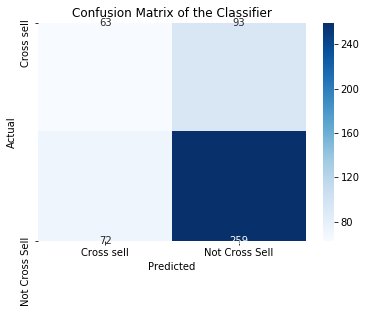

In [42]:
# Plotting the confusion matrix
visual_cm(true_y = y_test_scaled,
          pred_y = logreg_pred,
          labels = ['Cross sell', 'Not Cross Sell'])

<h2><u> K-Nearest Neighbors (KNN)</u></h2>

Next we will apply the KNN-Model. <br> 
This is regarded to be sufficient for both classification and regression tasks. <br>



<h3><u> Neighbor Identification </u></h3>

Here we are identifying the optimal number of neighbors based on our scaled train data we have defined earlier. <br>
It is inevitable to use scaled data for KNN.


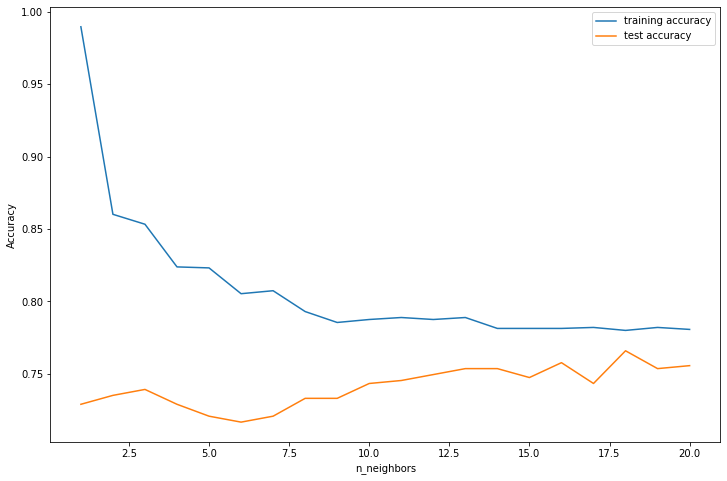

The optimal number of neighbors is 18


In [43]:
# KNN
#Creating empty lists for our accuracy sets
training_accuracy = []
test_accuracy     = []

#Visualising 1 - 21 neibours
neighbors_settings = range(1, 21)

X_scaled_df   =  X_scaled_df.loc[ : , candidate_dict['logit_sig']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            original_df_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = original_df_target)


for n_neighbors in neighbors_settings:
    Clf = KNeighborsClassifier(n_neighbors = n_neighbors) #Building model
    Clf.fit(X_train_scaled, y_train_scaled)

    training_accuracy.append(Clf.score(X_train_scaled, y_train_scaled)) #Recording training accuracy
    
    test_accuracy.append(Clf.score(X_test_scaled, y_test_scaled))       #Recording testing accuracy
    
#Visualising
fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

#Optimal number of neighbours
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

<h3><u> KNN Model </u></h3>

Having identified the right number of neighbors which is 18, we are now ready to run the model.
<br>
With a AUC score of .766 (76,6%), we have a solid prediction, also the difference between Training and Testing accuracy is below 5% and thus the model is not overfitting.


In [44]:
# Instantiating the KNN classification using 
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)

# Fitting the data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)

# Predicting based on testing
knn_pred = knn_fit.predict(X_test_scaled)

# Recording results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.78
Testing  ACCURACY: 0.7659
AUC Score        : 0.7668


<h2><u> CART-Model </u></h2>

Next we want to find out if a method of human oriented decision making is helping us to make better decisions.<br>
CART Model is based on desision tree decision learning. <br>
It visualizes a binary tree with every root representing a variable.



<h3><u> Full Tree </u></h3>

We will create a full tree and prune it then later. This will provide us the initial Accuracy and AUC scores.
<br>



In [45]:
#PLOT

full_tree        = DecisionTreeClassifier()

full_tree_fit    = full_tree.fit(X_train_scaled, y_train_scaled)

full_tree_pred   = full_tree.predict(X_test_scaled)

In [46]:
print('Training ACCURACY:',   full_tree_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing ACCURACY:',    full_tree_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score:',           roc_auc_score(y_true = y_test_scaled,
                              y_score = full_tree_pred).round(4))

Training ACCURACY: 0.9897
Testing ACCURACY: 0.729
AUC Score: 0.6871


['Model', 'Training AccuracyTesting Accuracy', 'AUC Value']
['KNN Classification', 0.78, 0.7659, 0.7668]


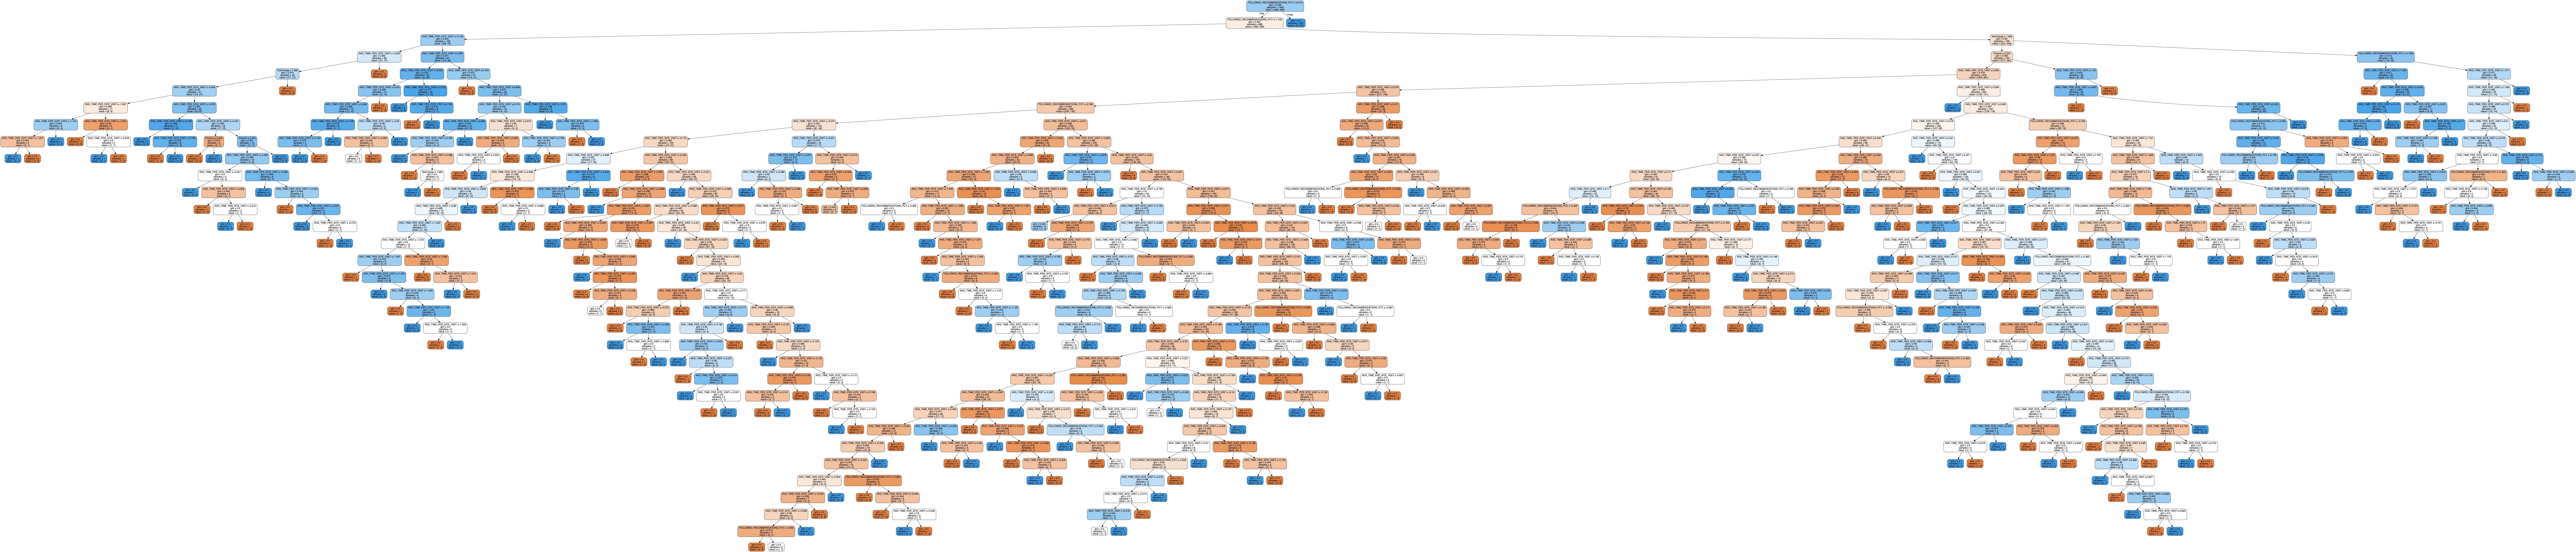

In [47]:
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)

knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)

knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)

def display_tree(tree, feature_df, height = 2000, width = 2500):

    dot_data = StringIO()

    
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

def plot_feature_importances(model, train, export = False):
    
    n_features = X_train_scaled.shape[1]
    
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])

for model in model_performance:
    print(model)
    
display_tree(tree = full_tree_fit,
             feature_df = X_train_scaled)

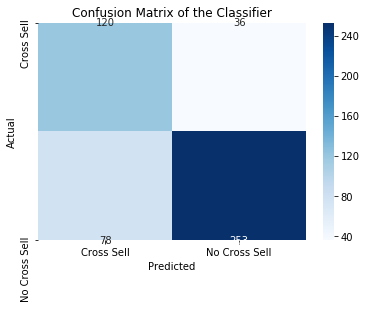

In [48]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Cross Sell', 'No Cross Sell'])

<h3><u> Pruned Tree </u></h3>

There is no insight from a full tree. Thus we have to prune the tree in order to extract valuable information.
<br>
We see that Followed recommendations is a very important variable together with the average time per visit. <br>



Training ACCURACY: 0.7772
Testing ACCURACY: 0.7659
AUC Score: 0.799


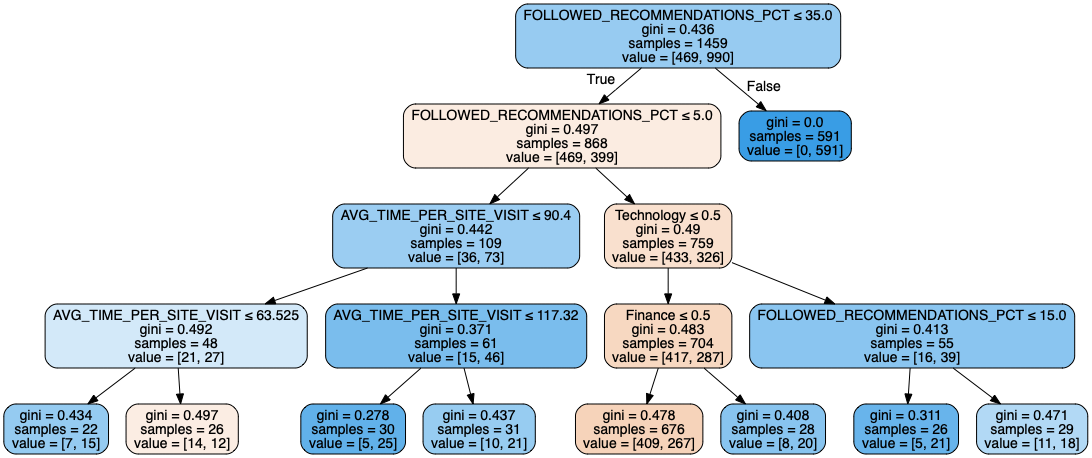

In [49]:
tree_pruned = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 20,
                                    random_state = 222)

tree_pruned_fit = tree_pruned.fit(X_train, y_train)

tree_pred = tree_pruned_fit.predict(X_test)

print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score:', roc_auc_score(y_true  = y_test,
                                  y_score = tree_pred).round(4))

display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

<h3><u> Feature Importance </u></h3>

To find out if and how much our variables are reliable to contribute to our overall objective,
we plot them. If a variable has no bar at all we remove it. <br>
This left us with 4 significant variables.
<br>



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


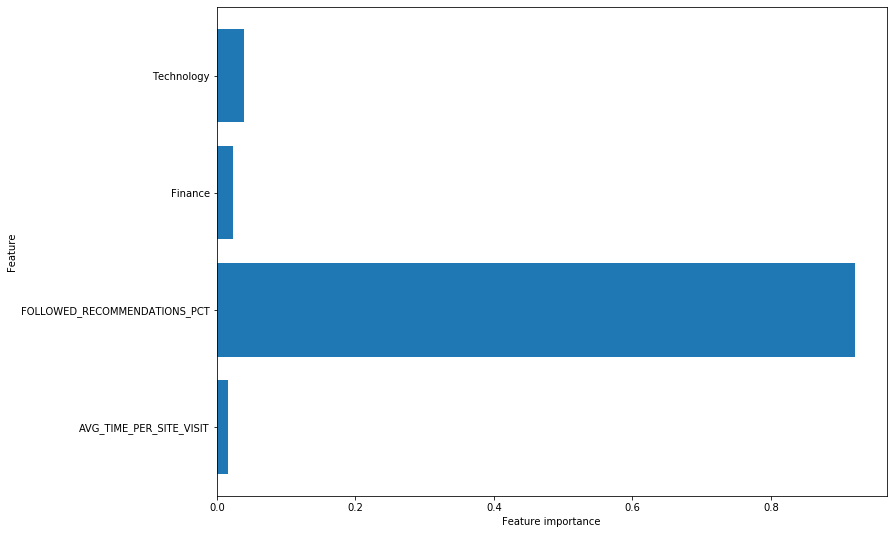

In [50]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

<h2><u> Gradient Boost Classifier </u></h2>

For our next model we will use an ensemble model. <br>
It runs as many times as specified for the estimators. <br>
To find the best number of estimators we will utilize a grid search.<br>
This is regarded to deliver better accuracies and AUC. <br><br>


Looking at the confusion matrix we see that the model is sufficient in predicting our business success. <br>
However we also find that the number for false prediction is too high. <br>
It can be lowered through neglecting or adding variables.  

<br>



Training ACCURACY: 0.7779
Testing ACCURACY : 0.7844
AUC Score        : 0.8075


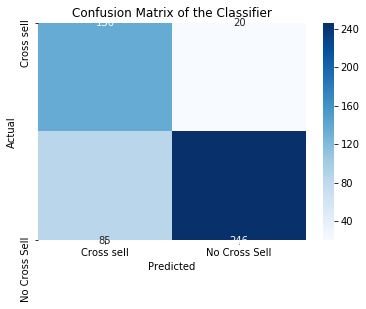

In [51]:
# INSTANTIATING the model object with hyperparameters

# Defining the Grid Search
gsc = GridSearchCV(
    estimator = GradientBoostingClassifier(),
    param_grid={'n_estimators': (10, 50, 100, 500)},
    cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_scaled_df, original_df_target)
best_adb = grid_result.best_params_

# INSTANTIATING the model 
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.02,
                                              n_estimators  = best_adb['n_estimators'],
                                              criterion     = 'friedman_mse',
                                              max_depth     = 1,
                                              warm_start    = False,
                                              random_state  = np.random)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = full_gbm_default_pred).round(4))


visual_cm(true_y = y_test_scaled,
          pred_y = full_gbm_default_pred,
          labels = ['Cross sell', 'No Cross Sell'])

<h2><u> ADA Boost Classifier </u></h2>

Next we will use Ada boost classifier. It is an iterative ensemble method. <br>
It combines rater weak classifier to a strong classifier and is therefore regarded to deliver good results here.<br>

In [52]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state= 222) 

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators= 80) 

# Fit 'adb_clf' to the training set
adb_clf_fit = adb_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
adb_clf_pred = adb_clf.predict(X_test)

# SCORING the results
print('Training ACCURACY:', adb_clf_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', adb_clf_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = adb_clf_pred).round(4))


Training ACCURACY: 0.7937
Testing ACCURACY : 0.77
AUC Score        : 0.7732


<h1><u> Final Results </u></h1><br>

Our winning model is the Gradient Boost Classifier. <br>


In [53]:
# Combining al results for comparison


# Creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]



# Adding the results for Logistic Regression


model_performance.append(["Logistic Regression",
                          logreg_fit.score(X_train, y_train).round(4),
                          logreg_fit.score(X_test, y_test).round(4),
                          roc_auc_score_af.round(4)])



# Adding the results for KNN 


model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])



# Saving the results for Full Tree

model_performance.append(["Full Tree",
                          full_tree_fit.score(X_train_scaled, y_train_scaled).round(4),
                          full_tree_fit.score(X_test_scaled, y_test_scaled).round(4),
                          roc_auc_score(y_true = y_test_scaled,
                              y_score = full_tree_pred).round(4)])


# Saving the results for Pruned Tree


model_performance.append(["Pruned Tree",
                          tree_pruned_fit.score(X_train, y_train).round(4),
                          tree_pruned_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                  y_score = tree_pred).round(4)])


    
# Saving the results for Gradient Boosting Classifier

model_performance.append(["GBC",
                           full_gbm_default_fit.score(X_train_scaled, y_train_scaled).round(4),
                           full_gbm_default_fit.score(X_test_scaled, y_test_scaled).round(4),
                           roc_auc_score(y_true  = y_test_scaled,
                                          y_score = full_gbm_default_pred).round(4)])

model_performance.append(["ADA",
                          adb_clf_fit.score(X_train, y_train).round(4),
                          adb_clf_fit.score(X_test, y_test).round(4),
                          roc_auc_score(y_true  = y_test,
                                          y_score = adb_clf_pred).round(4)])

adb_clf_fit.score(X_train, y_train).round(4)


# Converting to DataFrame and checking the results

pd.DataFrame(model_performance[1:], columns = model_performance[0])

Model  Training Accuracy  Testing Accuracy  AUC Value
0  Logistic Regression             0.6847            0.6612     0.5932
1   KNN Classification             0.7800            0.7659     0.7668
2            Full Tree             0.9897            0.7290     0.6871
3          Pruned Tree             0.7772            0.7659     0.7990
4                  GBC             0.7779            0.7844     0.8075
5                  ADA             0.7937            0.7700     0.7732